**Final Capstone: Image Classification of Cifar10 Dataset Using Transfer Learning**

In this project, a pre-trained model, tf2-preview/mobilenet_v2/classification, will be implemented to the cifar10 dataset from TensorFlow, and a new model will be created from the ground up and implemented to the same data. The accuracy scores of both models will be calculated and compared to understand if a pre-trained model works better than a newly created model.

The dataset that will be used consists of images of 10 classes, including airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. One application of this is to create an app that would be able to classify everyday objects and what they are for educational purposes, for students or foreigners visiting a new country. 


In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization

import tensorflow as tf

import time #Used to measure running time of each model 
import cv2 #to resize the data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing the cifar10 datset and dividing into train and test models.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


***Lets Explore the Dataset(Train and Test data)

In [4]:
#Get the shapes of each test and train data.
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("\ny_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)

y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


The data is composed of 60000 images, 50000 for training and 10000 for testing. The images are 32x32x3 pixels.

In [5]:
#Decrease the dataset to work with due to insufficient processing power and space (RAM)
#Get the first 10000 rows for training and 2000 for testing
X_train=X_train[:10000,:]
X_test=X_test[:2000,:]

y_train_svc=y_train=y_train[:10000,:]   #Creating variables for support vector machine model
y_test_svc=y_test=y_test[:2000,:]

In [6]:
#Confirm if the size change of the dataset
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("\ny_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (10000, 32, 32, 3)
X_test shape:  (2000, 32, 32, 3)

y_train shape:  (10000, 1)
y_test shape:  (2000, 1)


In [7]:
#Check the unique values of the target variable
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Target variable has values from 0 to 9, corresponding to classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck', respectively. 

In [8]:
#Create an array that holds each class name
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
#Lets prepare the dataset. There are 10 classes in total.
n_classes=10
#Convert the vectors to binary class matrix (one hot encoding)
y_train=to_categorical(y_train, n_classes)
y_test=to_categorical(y_test, n_classes)

In [10]:
#Confirm the shape of the target variables
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

y_train shape:  (10000, 10)
y_test shape:  (2000, 10)


In [11]:
#Data preprocessing
input_dim=32*32*3 
#Reshape the features to feed into the models
X_train=X_train.reshape(10000, input_dim)
X_test=X_test.reshape(2000, input_dim)

#Set them as float
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

In [12]:
#Confirm their shapes
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (10000, 3072)
X_test shape:  (2000, 3072)


In [13]:
#Normalize the data. Make sure the end values are between 0 and 1 to implement ML algorithms.
X_train/=255
X_test/=255

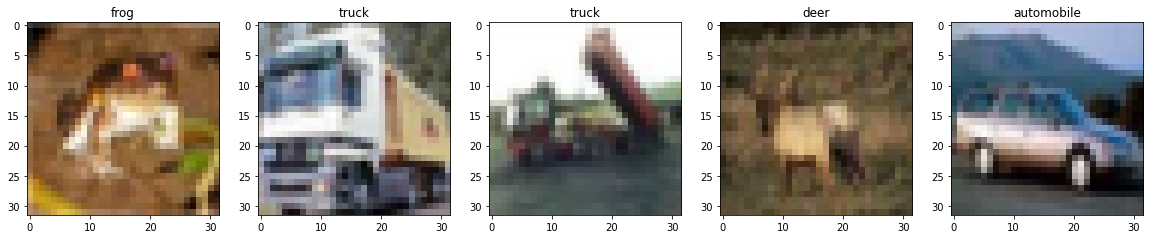

In [14]:
#Print image examples. Make sure to reshape data to display the image when using plt.imshow()

plt.figure(figsize=(20,5))
for image in range(5):
  plt.subplot(1,5,image+1)
  plt.imshow(X_train[image].reshape(32,32,3))
  plt.title(class_names[np.argmax(y_train[image])])
plt.show()

***Define your first model. Use five layers with 'relu' activation. Compile using 'sgd' optimizer and 'cross-entropy' as loss. Use 20 for epochs and 32 for batchsize. 

In [15]:
#Lets define first model.
model1=Sequential()
model1.add(Dense(128, input_shape=(3072,), activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(10, activation='softmax')) #Final output is 10 because we have 10 classes.

In [16]:
#Get model1 summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Compile model1
model1.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Start measuring time 
start_model1=time.time()

#Train model1. I will use batch size of 32
mod1=model1.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

#End measuring time
end_model1=time.time()
print('\nmodel1 processing time:', end_model1-start_model1) #Calculate time it took to train model1

Epoch 1/20
313/313 [==============================] - 3s 3ms/step - loss: 2.2124 - accuracy: 0.1533
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 2.0881 - accuracy: 0.2226
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9909 - accuracy: 0.2818
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9096 - accuracy: 0.3019
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8549 - accuracy: 0.3262
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8149 - accuracy: 0.3409
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7775 - accuracy: 0.3523
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 1.7546 - accuracy: 0.3632
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7195 - accuracy: 0.3777
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7041 - accuracy: 0.3808

In [19]:
#Now evalute model1 test set
model1_score=model1.evaluate(X_test, y_test)
print("test score:", model1_score[0])
print("Test accuracy:", model1_score[1])

63/63 [==============================] - 0s 2ms/step - loss: 2.0402 - accuracy: 0.3315
test score: 2.0401735305786133
Test accuracy: 0.33149999380111694


In [20]:
model1_score[1]

0.33149999380111694

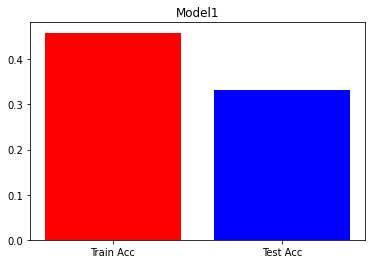

In [21]:
plt.bar(['Train Acc','Test Acc'], [np.max(mod1.history['accuracy']), model1_score[1]], color=['r','b'])
plt.title("Model1")
plt.show()

The performance of the model is not well. The accuracy of the train data and test data are 0.46 and 0.41, respectively, as shown on the graph above. The model overfits. Time to train the model took 15.7 seconds.

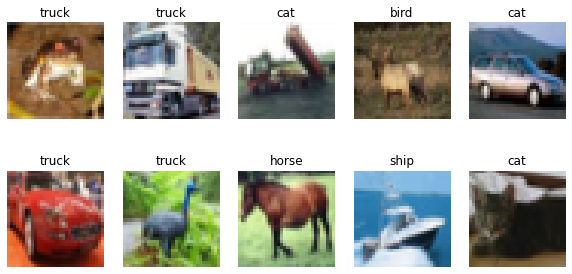

In [22]:
#Lets predict first 10 indexes of the training data.
plt.figure(figsize=(10,5))
for i in range(10):
  predicted = model1.predict(np.array([X_train[i]]))
  predicted=class_names[np.argmax(y_train[(np.argmax(predicted))])]  
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i].reshape(32,32,3))
  plt.title(predicted)
  plt.axis('off')
plt.show()

The model only predicted 3 images correctly out of 10 as indicated above. This is not good.

To prevent overfitting, use regularization technique, 'dropout' but keep all other parameters same. Set dropout rate to 0.25. 

In [23]:
#Lets define the second model.
model2=Sequential()
model2.add(Dense(128, input_shape=(3072,), activation='relu'))
model2.add(Dropout(0.25)) #0.50 Did not perform well. Model underfits.
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(10, activation='softmax')) #Final output is 10 because we have 10 classes.

#Compile model1
model2.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

#Start time
start_model2=time.time()
#Train model1. I will use batch size of 32
mod2=model2.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

end_model2=time.time()
print('\nmodel2 processing time:', end_model2-start_model2)

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 2.2480 - accuracy: 0.1635
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 2.1226 - accuracy: 0.2236
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 2.0163 - accuracy: 0.2608
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 1.9478 - accuracy: 0.2890
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 1.9044 - accuracy: 0.3082
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8706 - accuracy: 0.3244
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8385 - accuracy: 0.3316
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8049 - accuracy: 0.3436
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7872 - accuracy: 0.3585
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7713 - accuracy: 0.3580

In [24]:
#Now evalute model2 test set
model2_score=model2.evaluate(X_test, y_test)
print("test score:", model2_score[0])
print("Test accuracy:", model2_score[1])

63/63 [==============================] - 0s 2ms/step - loss: 1.7195 - accuracy: 0.3990
test score: 1.7194948196411133
Test accuracy: 0.39899998903274536


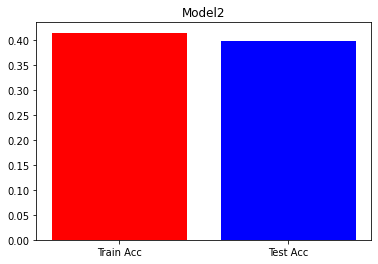

In [25]:
plt.bar(['Train Acc','Test Acc'], [np.max(mod2.history['accuracy']), model2_score[1]], color=['r','b'])
plt.title("Model2")
plt.show()

The performance of the model is still not doing well, and actually the accuracy on the training set decreased. However, using the 'dropout' regularization, the model does not overfit and is consistent over train and test datasets, as indicated on the graph above. Time to train the data is 16 seconds.



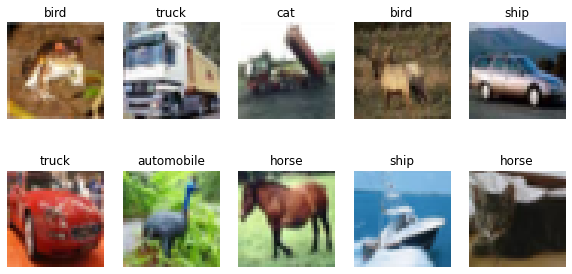

In [26]:
#Predict images using model2
plt.figure(figsize=(10,5))
for i in range(10):
  predicted = model2.predict(np.array([X_train[i]]))
  predicted=class_names[np.argmax(y_train[(np.argmax(predicted))])]  
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i].reshape(32,32,3))
  plt.title(predicted)
  plt.axis('off')
plt.show()

Model only predicted 2 images correclty.

In an attempt to increase the performance of the model, lets add BatchNormalization after Conv2D Layer on model3.

In [27]:
#Lets define the third model.

model3=Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(Conv2D(32, (3, 3)))
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.50)) 
model3.add(Flatten())
#model3.add(BatchNormalization())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.25)) 
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(10, activation='softmax')) #Final output is 10 because we have 10 classes.

#Compile model1
model3.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
#Train model1. I will use batch size of 32

start_model3=time.time()
mod3=model3.fit(X_train.reshape(10000,32,32,3), y_train, batch_size=32, epochs=20, verbose=1)

end_model3=time.time()
print('\nmodel3 processing time:', end_model3-start_model3)

Epoch 1/20
313/313 [==============================] - 9s 6ms/step - loss: 2.0434 - accuracy: 0.2624
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7371 - accuracy: 0.3734
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.5498 - accuracy: 0.4365
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.3900 - accuracy: 0.5001
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2638 - accuracy: 0.5446
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1247 - accuracy: 0.5971
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.9949 - accuracy: 0.6367
Epoch 8/20
313/313 [==============================] - 2s 6ms/step - loss: 0.8830 - accuracy: 0.6762
Epoch 9/20
313/313 [==============================] - 2s 6ms/step - loss: 0.7939 - accuracy: 0.7137
Epoch 10/20
313/313 [==============================] - 2s 6ms/step - loss: 0.6923 - accuracy: 0.7524

In [29]:
#Now evalute model3 test set
model3_score=model3.evaluate(X_test.reshape(2000,32,32,3), y_test)
print("test score:", model3_score[0])
print("Test accuracy:", model3_score[1])

63/63 [==============================] - 0s 4ms/step - loss: 2.0111 - accuracy: 0.5285
test score: 2.011143684387207
Test accuracy: 0.5285000205039978


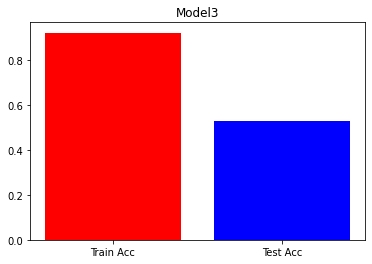

In [30]:
plt.bar(['Train Acc','Test Acc'], [np.max(mod3.history['accuracy']), model3_score[1]], color=['r','b'])
plt.title("Model3")
plt.show()

Using Batchnormalization did increase the accuracy of the training accuracy very high, however it caused overfitting as the performance of the test set was very low. Processing time was 46 seconds.

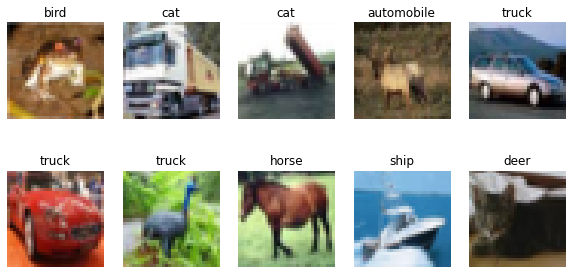

In [31]:

#Predict images using model3
plt.figure(figsize=(10,5))
for i in range(10):
  predicted = model3.predict(np.array([X_train[i].reshape(32,32,3)])) #Reshape to fit the model
  predicted=class_names[np.argmax(y_train[(np.argmax(predicted))])]  
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i].reshape(32,32,3))
  plt.title(predicted)
  plt.axis('off')
plt.show()

Model3 only predicted 2 images correclty.

For our 4th model, create a basic Support Vector Machines just for comparison to CNN models. Set kernel to 'linear'

In [32]:
from sklearn.svm import SVC

model_svc=SVC(kernel='linear') 

In [33]:
model_svc.fit(X_train, y_train_svc) 

SVC(kernel='linear')

In [34]:
model_svc.score(X_train, y_train_svc)

0.8855

In [35]:
model_svc.score(X_test, y_test_svc)

0.3355

Using basic SVC model, model performs well on the training set but not the test set. This is a basic model and will not be further worked on.

*Transfer Learning

Using the model, "tf2-preview/mobilenet_v2/classification" from Tensorflow Hub. This model is a pre-trained model for image classification tasks with an input size of 224x224 pixels. Therefore, the cifar10 dataset will be resized to 224x224 from 32x32 to fit the data into this pre-trained model.

In [36]:
#Import the necessary library to load the model
import tensorflow_hub as hub

#Load the model
data_shape=(224,224) #Image shape used to train the pre-trained model.
model_transfer = tf.keras.Sequential([ 
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=data_shape+(3,))])

In [37]:
#Change the shape of the features to resize them later
X_train=X_train.reshape(10000, 32,32,3)
X_test=X_test.reshape(2000, 32,32,3)

In [38]:
#Confirm their sizes
X_train.shape

(10000, 32, 32, 3)

In [39]:
#Resize all training data into a new array
X_train_pretrained=[]

for i in range(len(X_train)):
  train_sized=cv2.resize(np.array(X_train[i]), data_shape)
  X_train_pretrained.append(train_sized)

In [40]:
#Resize the test data 
X_test_pretrained=[]

for j in range(len(X_test)):
  test_sized=cv2.resize(np.array(X_test[j]), data_shape)
  X_test_pretrained.append(test_sized)

In [41]:
#Turn X_test_pretrained and X_train_pretrained to an array
X_train_pretrained=np.array(X_train_pretrained)
X_test_pretrained=np.array(X_test_pretrained)

In [42]:
#Confirm their sizes
print(X_train_pretrained.shape)
print(X_test_pretrained.shape)

(10000, 224, 224, 3)
(2000, 224, 224, 3)


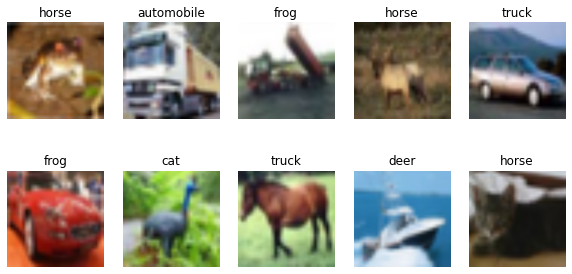

In [43]:
#Lets predict using the pre-trained model before training the data with cifar10 dataset
plt.figure(figsize=(10,5))
for i in range(10):
  predicted = model_transfer.predict(np.array([X_train_pretrained[i]]))
  predicted=class_names[np.argmax(y_train[(np.argmax(predicted))])]  
  plt.subplot(2,5,i+1)
  plt.imshow(X_train_pretrained[i])
  plt.title(predicted)
  plt.axis('off')
plt.show()

The performance of predicting the classes using the pre-trained model is not good. As indicated above, none the images do not correspond to their lables.

Next, we will train the pre-trained model using the cifar10 dataset and evaluate its performance. 

***Now re-train the pre-trained model with the cifar10 dataset.

In [44]:
#Reload the pre-trained model and set the trainable='False' to freeze its weights. 

data_shape=(224,224) #Image shape used to train the pre-trained model.
model_transfer = tf.keras.Sequential([ 
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=data_shape+(3,), trainable=False)])

In [45]:
#Define final model
model_2_transfer=Sequential()
model_2_transfer.add(model_transfer) #Add the pre-trained model with trainable set to False
model_2_transfer.add(Dense(10, activation='softmax')) #Final output is 10 because we have 10 classes.


In [46]:
model_2_transfer.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 1001)              3540265   
                                                                 
 dense_15 (Dense)            (None, 10)                10020     
                                                                 
Total params: 3,550,285
Trainable params: 10,020
Non-trainable params: 3,540,265
_________________________________________________________________


In [47]:
#Compile the model
model_2_transfer.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
start_model_2_transfer=time.time()

model2_transfer=model_2_transfer.fit(X_train_pretrained,  y_train, epochs=20)

end_model_2_transfer=time.time()
print('\nmodel_2_transfer processing time:', end_model_2_transfer-start_model_2_transfer)

Epoch 1/20
313/313 [==============================] - 12s 28ms/step - loss: 0.8820 - accuracy: 0.7082
Epoch 2/20
313/313 [==============================] - 9s 28ms/step - loss: 0.5559 - accuracy: 0.8117
Epoch 3/20
313/313 [==============================] - 9s 28ms/step - loss: 0.4922 - accuracy: 0.8344
Epoch 4/20
313/313 [==============================] - 9s 28ms/step - loss: 0.4562 - accuracy: 0.8454
Epoch 5/20
313/313 [==============================] - 9s 28ms/step - loss: 0.4326 - accuracy: 0.8541
Epoch 6/20
313/313 [==============================] - 9s 28ms/step - loss: 0.4128 - accuracy: 0.8594
Epoch 7/20
313/313 [==============================] - 9s 28ms/step - loss: 0.3966 - accuracy: 0.8651
Epoch 8/20
313/313 [==============================] - 9s 28ms/step - loss: 0.3870 - accuracy: 0.8631
Epoch 9/20
313/313 [==============================] - 9s 28ms/step - loss: 0.3778 - accuracy: 0.8701
Epoch 10/20
313/313 [==============================] - 9s 28ms/step - loss: 0.3635 - accur

In [49]:
#Evaluate the performance using the test data
model_2_transfer_score=model_2_transfer.evaluate(X_test_pretrained, y_test)

63/63 [==============================] - 2s 28ms/step - loss: 0.5780 - accuracy: 0.8190


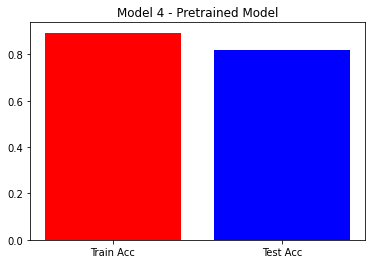

In [50]:
plt.bar(['Train Acc','Test Acc'], [np.max(model2_transfer.history['accuracy']), model_2_transfer_score[1]], color=['r','b'])
plt.title("Model 4 - Pretrained Model")
plt.show()

The consistency of accuracy of model_2_transfer in train and test datasets is the highest among all other models. The model seems to overfit and maybe be tuned more to hinder overfitting but it did achive the highest accuracy on the test set with more than 82%, as indicated on the graph above. 

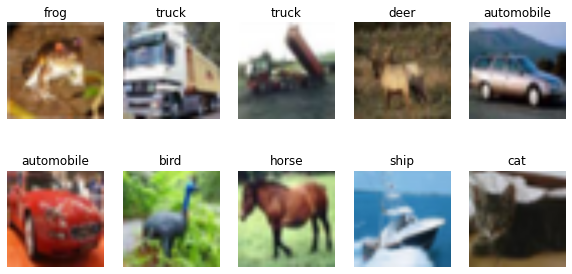

In [51]:
#Lets predict using the pre-trained model after training the data with cifar10 dataset
plt.figure(figsize=(10,5))
for i in range(10):
  predicted = model_2_transfer.predict(np.array([X_train_pretrained[i]]))
  predicted = class_names[np.argmax(predicted)]
  plt.subplot(2,5,i+1)
  plt.imshow(X_train_pretrained[i])
  plt.title(predicted)
  plt.axis('off')
plt.show()

The performance of predicting the classes using the pre-trained model trained in Cifar10 dataset is highly accurate. As indicated on the predictions above, all the images are classfied correctly. Processing time was 270 seconds.

Results: Based on the performance seen of the models, the best performing model is the model_2_transfer, which is a re-trained of pre-trained model using Cifar10 dataset. Altough the processing time was longer compared to other CNN models, the prediction accuracy makes it worth using.